# 5. Kernelizing the Perceptron 
Let there be a binary classification problem with $y\in\{0,1\}$. The perceptron uses hypotheses of the form $h_{\theta}(x)=g(\theta^Tx)$,where $g(z)={\rm sign}(z)= 1$ if $z \geq 0$, $0$ otherwise. In this problem we will consider a stochastic gradient descent-like implementation of the perceptron algorithm where each update to the parameters $\theta$ is made using only one training example. However, unlike stochastic gradient descent, the perceptron algorithm will only make one pass through the entire training set. The update rule for this version of the perceptron algorithm is given by

\begin{align*}
\theta^{(i+1)} := \theta^{(i)} + \alpha\left(y^{(i+1)} -h_{\theta^{(i)}} (x^{(i+1)})\right)x^{(i+1)}
\end{align*}

where $\theta^{(i)}$ is the value of the parameters after the algorithm has seen the first $i$ training examples.
Prior to seeing any training examples, $\theta^{(0)}$ is initialized to $\vec{0}$.

__(a)__ [9 points] Let $K$ be a Mercer kernel corresponding to some very high-dimensional feature mapping $\phi$. Suppose $\phi$ is so high-dimensional (say, $\infty$-dimensional) that it's infeasible to ever represent $\phi(x)$ explicitly. Describe how you would apply the “kernel trick” to the perceptron to make it work in the high-dimensional feature space $\phi$, but without ever explicitly computing $\phi(x)$.

[__Note__: You don’t have to worry about the intercept term. If you like, think of $\phi$ as having the property that $\phi_0(x) = 1$ so that this is taken care of.] Your description should specify:

__i.__ [3 points] How you will (implicitly) represent the high-dimensional parameter vector $\theta^{(i)}$, including how the initial value $\theta^{(0)} = 0$ is represented (note that $\theta^{(i)}$ is now a vector whose dimension is the same as the feature vectors $\phi(x)$);

__ii.__ [3 points] How you will efficiently make a prediction on a new input $x^{(i+1)}$. I.e., how
you will compute $h_{\theta^{(i)}}(x(i+1)) = g({\theta^{(i)}}^T \phi(x^{(i+1)}))$, using your representation of $\theta^{(i)}$;
and

__iii.__ [3 points] How you will modify the update rule given above to perform an update to $\theta$
on a new training example $(x^{(i+1)},y^{(i+1)})$; *i.e.*, using the update rule corresponding to the feature mapping $\phi$:


\begin{align*}
\theta^{(i+1)} := \theta^{(i)} + \alpha\left(y^{(i+1)}-h_{\theta^{(i)}} (x^{(i+1)})\right)\phi(x^{(i+1)}).
\end{align*}

### Answer:

<b>i.</b> We can assume that $$\theta^{(i)} = \sum_{j=1}^m \beta^{(i)}_j \phi(x^{(j)}).$$
So to have $\theta^{(i)}$, we need to determine $\beta^{(i)}_j$'s.
    
<b> ii.</b> If we have $\beta^{(i)}_j$'s, then 
    $${\theta^{(i)}}^T \phi(x^{(k)}) = \sum_{j=1}^m\beta^{(i)}_j K(x^{(j)}, x^{(k)}).$$

    
<b> iii.</b> The update corresponding to the training example $(x^{(l)},y^{(l)})$ is
    
\begin{align*}
\theta^{new} 
&= \theta^{old} + \alpha\left(y^{(l)}-h_{\theta^{old}} (x^{(l)})\right)\phi(x^{(l)})\\
& = \sum_{j=1}^m \beta^{old}_j \phi(x^{(j)}) + 
\alpha\left(y^{(l)}- {\rm sign}\left(\sum_{j=1}^m\beta^{old}_j K(x^{(j)}, x^{(l)})\right)\right)\phi(x^{(l)})\\
& = \sum_{j=1}^m \beta^{new}_j \phi(x^{(j)}),
\end{align*}
    
where $\beta^{new}_j = \beta^{old}_j$ for all $j\neq l$ and 
\begin{align*}
\beta^{new}_{l} = \beta^{old}_{l} + \alpha\left(y^{(l)}-{\rm sign}\left(\sum_{j=1}^m\beta^{old}_j K(x^{(j)}, x^{(l)})\right)\right).
\end{align*}
    
#### If we want to go over the data only once, then $\beta^{old}_{l} = 0$ for each $l$(what we do in the following algorithm!).

<b>(b)</b> [5 points] Implement your approach by completing the initial state, predict, and
update state methods of `src/p05_percept.py`.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

import src.util as util

In [2]:
def initial_state():
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.

    """

    # *** START CODE HERE ***
    return []
    # *** END CODE HERE ***


def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance
    
    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    # *** START CODE HERE ***
    Sum = 0
    for b, x in state:
        Sum += b * kernel(x, x_i)
    return sign(Sum)
        
    # *** END CODE HERE ***


def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    # *** START CODE HERE ***
    beta = learning_rate * (y_i - predict(state, kernel, x_i))
    state.append((beta, x_i))
    # *** END CODE HERE ***


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('data/ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('data/ds5_train.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.savefig('output/p05_{}_output.pdf'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]
    np.savetxt('output/p05_{}_predictions.txt'.format(kernel_name), predict_y)
    print('Accuracy using {} kernel is {}%'.format(kernel_name, 100 * np.mean(np.array(predict_y)==test_y)))
    plt.show()


def main():
    train_perceptron('dot', dot_kernel, 0.5)
    train_perceptron('rbf', rbf_kernel, 0.5)

__(c)__ [2 points] Run src/p05percept.py to train kernelized perceptrons on `data/ds5train.csv`. The code will then test the perceptron on `data/ds5_test.csv` and save the resulting predictions in the `src/output` folder. Plots will also be saved in src/output. We provide two kernels, a dot product kernel and an radial basis function (rbf) kernel. One of the provided kernels performs extremely poorly in classifying the points. Which kernel performs badly and why does it fail?
### <font color=red> Answer:</font>

Accuracy using dot kernel is 48.0%


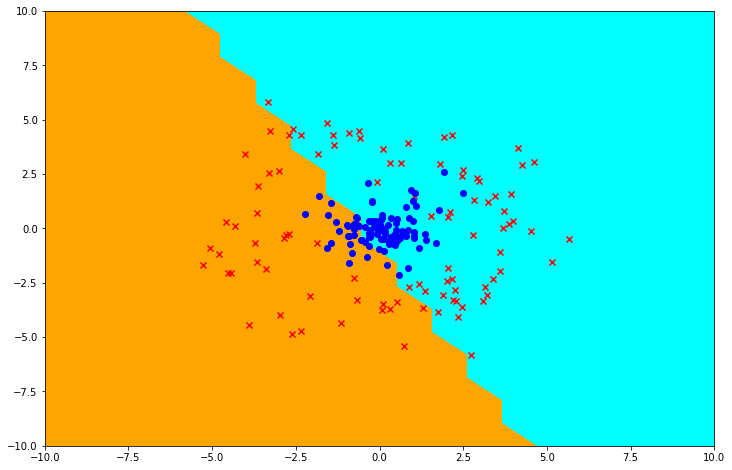

Accuracy using rbf kernel is 94.5%


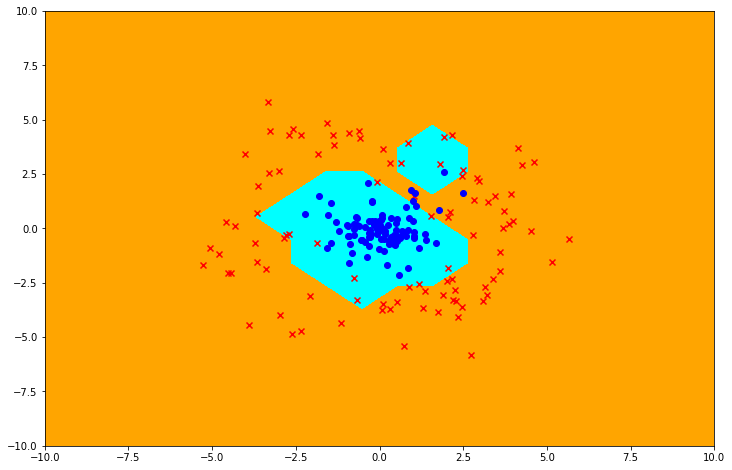

In [3]:
main()

When we use `dot_kernel`, we are indeed using the raw data with no feature mapping while the data is not lineraly seperable. So, in this situation, the algorithm performs  poorly in classifying the points. 